# **EDA**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load dataset
file_path = '/content/drive/MyDrive/Sequence_Data/drug_data.csv'
df = pd.read_csv(file_path, encoding='utf-8')

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25215 entries, 0 to 25214
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   품목일련번호          25215 non-null  int64  
 1   품목명             25215 non-null  object 
 2   업소일련번호          25215 non-null  int64  
 3   업소명             25215 non-null  object 
 4   성상              25215 non-null  object 
 5   큰제품이미지          25215 non-null  object 
 6   표시앞             25214 non-null  object 
 7   표시뒤             25213 non-null  object 
 8   의약품제형           25215 non-null  object 
 9   색상앞             25215 non-null  object 
 10  색상뒤             25215 non-null  object 
 11  분할선앞            25215 non-null  object 
 12  분할선뒤            25215 non-null  object 
 13  크기장축            25215 non-null  object 
 14  크기단축            25215 non-null  object 
 15  크기두께            25215 non-null  object 
 16  이미지생성일자(약학정보원)  25215 non-null  int64  
 17  분류번호            25215 non-null 

In [5]:
display(df[['품목일련번호', '색상앞', '색상뒤']].head())

,품목일련번호,색상앞,색상뒤
0,200808876,연두,-
1,200808877,노랑,-
2,200808948,하양,-
3,200809076,하양,-
4,200809361,분홍,-


In [6]:
display(df[['품목일련번호', '색상앞', '색상뒤']].tail())

,품목일련번호,색상앞,색상뒤
25210,202301799,분홍,-
25211,202301798,갈색,-
25212,202301962,분홍,-
25213,202301961,분홍,-
25214,201501680,하양|노랑,하양|노랑


In [7]:
# Check missing values
print(df[['품목일련번호', '색상앞', '색상뒤']].isna().sum())

품목일련번호    0
색상앞       0
색상뒤       0
dtype: int64


In [9]:
# Check duplicated values
display(df[df.duplicated(subset='품목일련번호')][['품목일련번호', '색상앞', '색상뒤']])

,품목일련번호,색상앞,색상뒤
408,200906540,하양,-
1823,200209641,노랑,-
1824,200209641,노랑,-
6905,200401818,하양,-
7117,200202793,하양,-
7234,200201478,초록,-
7237,200300393,주황,하양
15363,201706587,노랑,-
15364,201706587,노랑,-
15365,201706587,노랑,-


In [10]:
# Check types of color
print(df[['색상앞', '색상뒤']].value_counts())

색상앞  색상뒤
하양   -      8745
분홍   -      3362
노랑   -      2484
주황   -      1972
갈색   -      1170
            ... 
파랑   초록        1
     투명        1
분홍   자주        1
     빨강        1
-    -         1
Name: count, Length: 195, dtype: int64


In [11]:
print(df['색상앞'].value_counts())

색상앞
하양          9599
분홍          3464
노랑          2982
주황          2247
갈색          1514
파랑          1356
연두          1240
초록           935
빨강           596
회색           197
노랑|투명        162
보라           118
빨강|투명         99
파랑|투명         95
초록|투명         89
주황|투명         79
검정            73
청록            67
자주            64
청록|투명         45
남색            43
하양|노랑         30
투명            25
갈색|투명         23
보라|투명         21
하양|투명         14
하양|파랑         12
분홍|투명          6
하양|갈색          5
연두|투명          5
파랑|옅은          1
갈색|진한          1
하양|초록          1
하양|주황|투명       1
하양|빨강          1
분홍|진한          1
분홍|옅은          1
자주|투명          1
하양|청록          1
-              1
Name: count, dtype: int64


In [12]:
print(df['색상뒤'].value_counts())

색상뒤
-           21168
하양           1701
노랑            851
파랑            208
연두            180
초록            177
분홍            170
회색            150
주황            149
갈색            139
빨강            106
투명             42
하양|투명          24
노랑|옅은          17
분홍|투명          17
주황|투명          14
파랑|옅은          14
하양|파랑          12
자주             12
보라             10
하양|노랑           8
갈색|옅은           5
청록              5
노랑|투명           4
갈색|진한           4
회색|진한           4
남색              4
검정              3
초록|투명           2
청록|투명           2
분홍|옅은           1
파랑|진한           1
검정|투명           1
자주|옅은           1
초록|진한           1
청록|옅은           1
주황|옅은           1
노랑|진한           1
자주|진한           1
연두|진한           1
하양|초록|투명        1
초록|옅은           1
하양|청록           1
Name: count, dtype: int64


In [21]:
# Check data with different front and back colors
df_1 = df[df['색상뒤'] != '-']
different = df_1[df_1['색상앞'] != df_1['색상뒤']]
print(len(different))

2099


In [22]:
display(different[['품목일련번호', '색상앞', '색상뒤']].head())

,품목일련번호,색상앞,색상뒤
37,200900605,초록,하양
42,200900845,초록,노랑
56,200903045,빨강,파랑
75,200903585,갈색,하양
85,200902301,하양|빨강,하양


In [24]:
# Check data with two colors
two = df[df['색상앞'].str.contains('\|')]
print(len(two))

694


In [25]:
display(two[['품목일련번호', '색상앞', '색상뒤']].head())

,품목일련번호,색상앞,색상뒤
69,200903392,청록|투명,-
70,200903395,파랑|투명,-
85,200902301,하양|빨강,하양
87,200902364,청록|투명,-
89,200902506,청록|투명,-


# **Data Preprocessing**

In [26]:
# Check data with color value -
print(df.index[(df['색상앞'] == '-')])

Index([24956], dtype='int64')


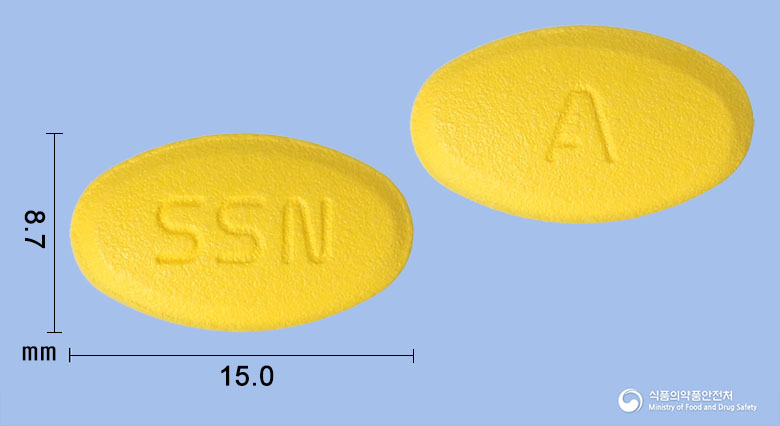

In [29]:
# Replace - with yellow color
df.replace({'색상앞': '-'}, '노랑', inplace=True)

In [31]:
# Slice front color value
front = df.copy()
front['색상앞'] = front['색상앞'].str.slice(start=0, stop=2)

In [32]:
# Re-check types of shape
print(front['색상앞'].value_counts())

색상앞
하양    9664
분홍    3472
노랑    3145
주황    2326
갈색    1538
파랑    1452
연두    1245
초록    1024
빨강     695
회색     197
보라     139
청록     112
검정      73
자주      65
남색      43
투명      25
Name: count, dtype: int64


In [ ]:
# Remove duplicated values
df = df[~df.duplicated(subset='품목일련번호')]

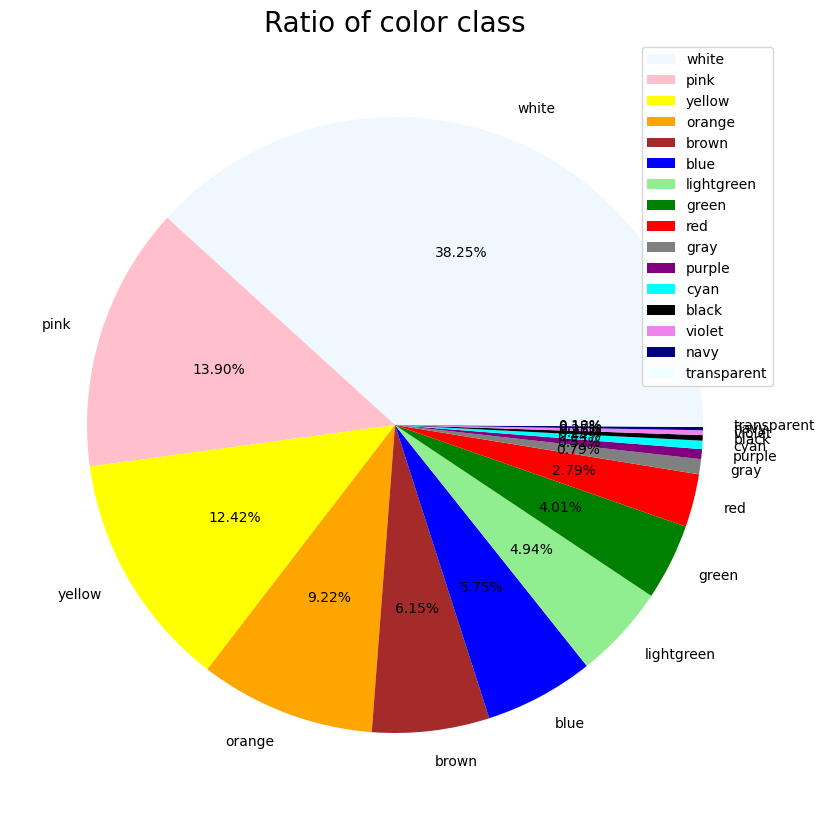

In [8]:
# Visualize ratio of shape class
# rat = [9664, 3472, 3145, 2326, 1538, 1452, 1245, 1024, 695, 197, 139, 112, 73, 65, 43, 25]   # when duplicated values did not removed
rat = [9482, 3445, 3079, 2286, 1525, 1426, 1224, 994, 691, 196, 129, 109, 71, 63, 42, 25]     # when duplicated values removed
labels = ['white', 'pink', 'yellow', 'orange', 'brown', 'blue', 'lightgreen', 'green', 'red', 'gray', 'purple', 'cyan', 'black', 'violet', 'navy', 'transparent']
colors = ['aliceblue', 'pink', 'yellow', 'orange', 'brown', 'blue', 'lightgreen', 'green', 'red', 'gray', 'purple', 'cyan', 'black', 'violet', 'navy', 'azure']
plt.figure(figsize=(10, 10))
plt.pie(rat, labels=labels, autopct='%.2f%%', colors=colors)
plt.title('Ratio of color class', fontsize=20)
plt.legend(loc='upper right')
plt.show()

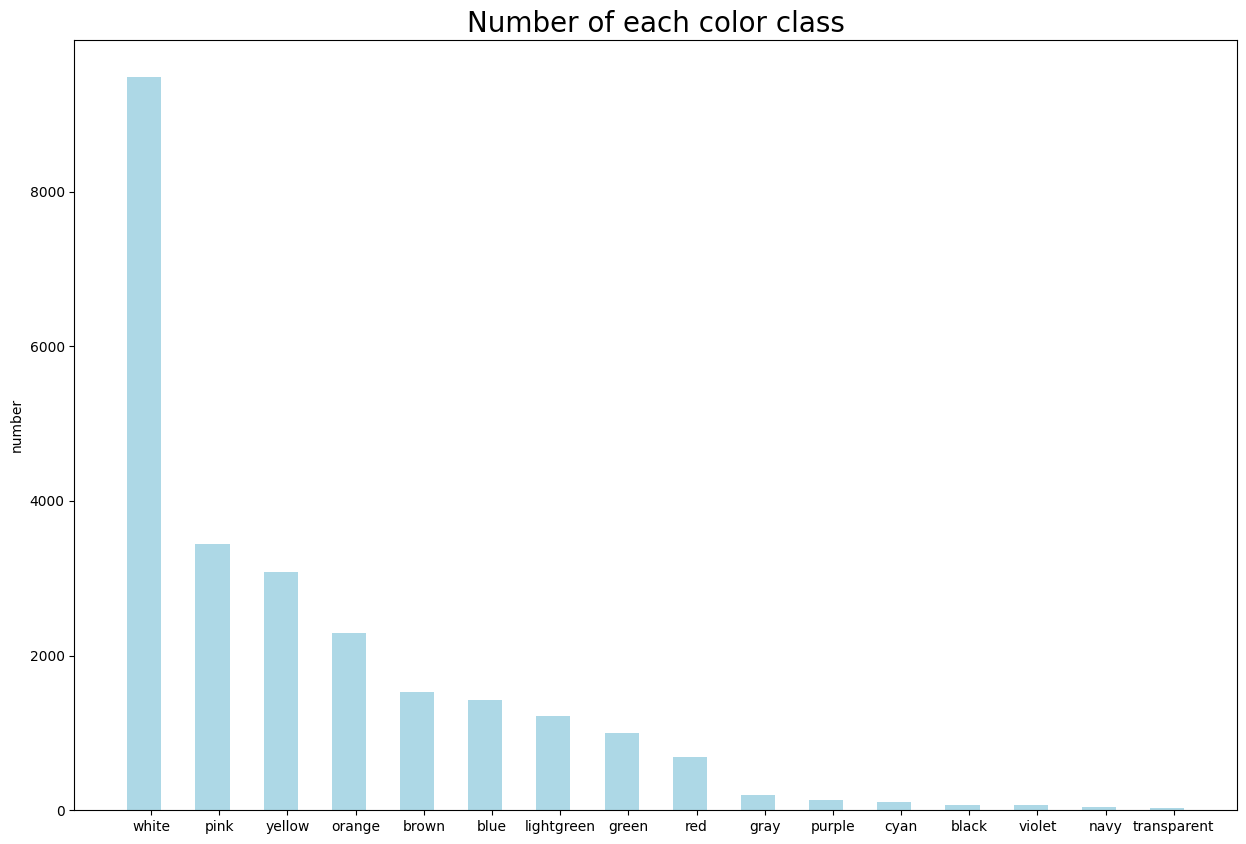

In [10]:
# Visualize number of each shape class
labels = ['white', 'pink', 'yellow', 'orange', 'brown', 'blue', 'lightgreen', 'green', 'red', 'gray', 'purple', 'cyan', 'black', 'violet', 'navy', 'transparent']
# rat = [9664, 3472, 3145, 2326, 1538, 1452, 1245, 1024, 695, 197, 139, 112, 73, 65, 43, 25]   # when duplicated values did not removed
rat = [9482, 3445, 3079, 2286, 1525, 1426, 1224, 994, 691, 196, 129, 109, 71, 63, 42, 25]     # when duplicated values removed
plt.figure(figsize=(15, 10))
plt.bar(labels, rat, color='lightblue', width=0.5)
plt.ylabel('number')
plt.title('Number of each color class', fontsize=20)
plt.xticks([i + 0.1 for i, _ in enumerate(labels)], labels)
plt.show()

# **Modeling**

In [ ]:
import numpy as np
from keras.preprocessing import image
from glob import glob
from sklearn.model_selection import train_test_split
from tensorflow.keras import utils, models, layers, optimizers

In [ ]:
# Load images
images = [image.load_img(p, target_size=(130, 70))   # 780, 420
          for p in glob('data/color/white/*png') + glob('data/color/pink/*png') + glob('data/color/yellow/*png') + glob('data/color/orange/*png')
          + glob('data/color/brown/*png') + glob('data/color/blue/*png') + glob('data/color/lightgreen/*png') + glob('data/color/green/*png')
          + glob('data/color/red/*png') + glob('data/color/gray/*png') + glob('data/color/purple/*png') + glob('data/color/cyan/*png')
          + glob('data/color/black/*png') + glob('data/color/violet/*png') + glob('data/color/navy/*png') + glob('data/color/transparent/*png')]
image_vector = np.asarray([image.img_to_array(img) for img in images])

# Set labels
y = [15] * 9482 + [14] * 3445 + [13] * 3079 + [12] * 2286 + [11] * 1525 + [10] * 1426 + [9] * 1224 + [8] * 993
    + [7] * 691 + [6] * 196 + [5] * 129 + [4] * 109 + [3] * 71 + [2] * 63 + [1] * 42 + [0] * 25

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(image_vector, y, test_size=0.20, random_state=42)

# Scale the input data
X_train, X_test = X_train / 255, X_test / 255

# Convert to categorical
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

# Build model
def build(input_shape, classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.25))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(classes, activation='softmax'))
    return model

# Initialize and fit the model
model = build((130, 70, 3), 16)
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

# Evaluate the model
score = model.evaluate(X_test, y_test)
print("Test loss:", score[0])       # 0.3447597622871399
print("Test accuracy:", score[1])   # 0.8886647820472717

# Save the model
model.save('cnn_color.h5')